<a href="https://colab.research.google.com/github/Kcurr01/HUT_Research/blob/main/VAE_10_10_%7C_5_00pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np                             
                                
import matplotlib.pyplot as plt
import seaborn as sns            
                
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [33]:
df = pd.read_csv("/content/drive/MyDrive/WEAR LAB/Research Pytorch/S1_E1_A1_v3.csv")

In [34]:
df.head()

,series_id,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
0,0,0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,...,20.974,-25.345,-3.9720,27.264,21.548,-0.084706,13.292,65.755,2.4706,24.565
1,0,0,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,...,20.924,-25.345,-3.9011,27.264,21.478,-0.084706,13.292,65.755,2.4706,24.565
2,0,0,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,...,20.875,-25.345,-3.8301,27.264,21.407,-0.084706,13.292,65.755,2.4706,24.565
3,0,0,0.30176,0.78809,-0.66699,15,10,19,9,10,...,20.826,-25.345,-3.7592,27.264,21.337,-0.084706,13.292,65.755,2.4706,24.565
4,0,0,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,...,20.776,-25.345,-3.6883,27.264,21.267,-0.084706,13.292,65.755,2.4706,24.565


In [35]:
# distribution of first 16 features


# fig, axs = plt.subplots(nrows=11, ncols=4, figsize=(60, 60))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 43:
#     break 
# plt.tight_layout()

In [36]:
X = df.iloc[:,2:]
y = df.iloc[:, 1:2]
print(X.shape, type(X), y.shape, type(y))

(130200, 41) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>


In [37]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,...,20.974,-25.345,-3.9720,27.264,21.548,-0.084706,13.292,65.755,2.4706,24.565
1,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,...,20.924,-25.345,-3.9011,27.264,21.478,-0.084706,13.292,65.755,2.4706,24.565
2,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,...,20.875,-25.345,-3.8301,27.264,21.407,-0.084706,13.292,65.755,2.4706,24.565
3,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,...,20.826,-25.345,-3.7592,27.264,21.337,-0.084706,13.292,65.755,2.4706,24.565
4,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,...,20.776,-25.345,-3.6883,27.264,21.267,-0.084706,13.292,65.755,2.4706,24.565


In [38]:
y.head()

,stimulus
0,0
1,0
2,0
3,0
4,0


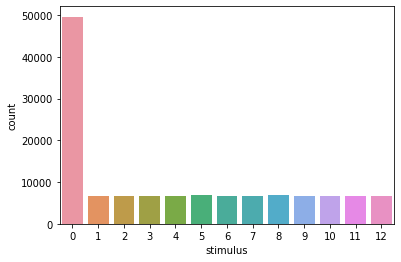

In [39]:
sns.countplot(x = 'stimulus', data=df)

In [40]:
X = df.iloc[:,2:].values
y = df.iloc[:, 1:2].values
print(X.shape, type(X), y.shape, type(y))

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=32) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).float()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).float()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).float()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

(130200, 41) <class 'numpy.ndarray'> (130200, 1) <class 'numpy.ndarray'>
X_train size: 78120 | X_val size: 26040 | X_test size: 26040
y_train size: 78120 | y_val size: 26040 | y_test size: 26040

Training Feature Split: (78120, 41) | Training Labels (78120, 1)
Validation Feature Split: (26040, 41) | Validation Labels (26040, 1)
Testing Feature Split: (26040, 41) | Testing Labels (26040, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([78120, 41]) , torch.Size([78120, 1])
Validation: torch.Size([26040, 41]) , torch.Size([26040, 1])
Testing:  torch.Size([26040, 41]) , torch.Size([26040, 1])


In [41]:
class ClassifierDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)
print(training[25])

#Hyperparameters
latent_dim = 2
input_dim= 41
hidden_dim= 20
output_dim = 41
num_epochs= 20
batch_size= 100
num_classes = 13
learning_rate= 0.00003 #3e-4 #Karpathy constant

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


(tensor([0.4411, 0.7754, 0.6339, 0.4902, 0.4706, 0.4272, 0.3529, 0.4701, 0.5059,
        0.4844, 0.4192, 0.5216, 0.5333, 0.5234, 0.4837, 0.5110, 0.4980, 0.4860,
        0.5066, 0.3267, 0.3404, 0.3429, 0.6503, 0.6087, 0.3098, 0.1124, 0.5870,
        0.2770, 0.3750, 0.4997, 0.4000, 0.2740, 0.2560, 0.8691, 0.4685, 0.4819,
        0.3714, 0.9252, 0.8292, 0.2273, 0.3448]), tensor([0.]))


In [42]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x)) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   
    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")
    return (x_reconstructed, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(100,41)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed , mu, logvar = vae(x)
  print(x_reconstructed.shape)
  print(mu.shape)
  print(logvar.shape)

torch.Size([100, 41])
torch.Size([100, 2])
torch.Size([100, 2])


In [43]:
model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")

VAE(
  (fc1): Linear(in_features=41, out_features=20, bias=True)
  (mu): Linear(in_features=20, out_features=2, bias=True)
  (logvar): Linear(in_features=20, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=41, bias=True)
)


In [44]:
train_losses=[]
val_losses=[]
train_acc=[]
val_acc=[]

for epoch in range(num_epochs):
  train_running_acc = 0
  train_running_loss = 0
#  loop = tqdm(train_loader)
  for i, data in enumerate(train_loader):
    inputs, labels = data
    #print(f'type data: {type(data)}')
    #print(f'type inputs: {type(inputs)}')
    #print(f'type labels: {type(labels)}')

    x_reconstructed, mu, logvar = model(inputs)
    #print(x_reconstructed, type(x_reconstructed))
    #print(mu, type(mu))
    #print(logvar, type(logvar))

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    loss = reconstruction_loss + kld_loss
    #print(reconstruction_loss, kld_loss, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)
  
  with torch.inference_mode():
    val_running_acc = 0
    val_running_loss = 0
    model.eval()
    for inputs, labels in val_loader:
      #print(labels)
      #inputs = torch.autograd.Variable(inputs)
      y_pred, mu, logvar = model(inputs)

      v_reconstruction_loss = loss_fn(y_pred, inputs)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
      vloss = v_reconstruction_loss + v_kld_loss
      #print(v_reconstruction_loss, v_kld_loss, vloss)
      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

  print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.3f} | total loss: {loss:.3f} ||| Val Loss: {val_loss:.3f}")
  print("------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

Epoch: 1 / 20 | reconst_loss: 23.405 | kldiv loss: 0.074 | total loss: 23.479 ||| Val Loss: 116.369
------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 20 | reconst_loss: 19.971 | kldiv loss: 0.026 | total loss: 19.996 ||| Val Loss: 97.378
------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 20 | reconst_loss: 15.903 | kldiv loss: 0.026 | total loss: 15.929 ||| Val Loss: 81.882
------------------------------------------------------------------------------------------------------------------
Epoch: 4 / 20 | reconst_loss: 17.626 | kldiv loss: 0.030 | total loss: 17.656 ||| Val Loss: 70.130
------------------------------------------------------------------------------------------------------------------
Epoch: 5 / 20 | reconst_loss: 13.463 | kldiv loss: 0.032 | total loss: 13.494 ||| Val Loss: 61.507
--------------------------------------------

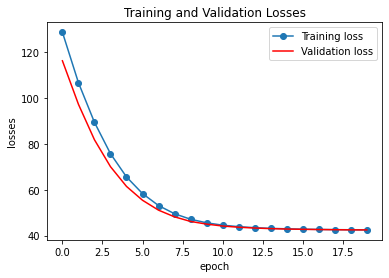

In [45]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [46]:
def plot_latent(model, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        z, mu, logvar = model(inputs)
        z = x.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

plot_latent(model, data)

ValueError: ignored

---
Test
---

In [ ]:
# class Loss_Term(nn.Module):
#   def __init__(self):
#     super(Loss_Term, self).__init__()
#     self.mse_loss = nn.MSELoss(reduction="sum")
#     #self.ce_loss = nn.CrossEntropyLoss(reduction="sum")
# # x_reconstructed is the recon_batch created in the forward in the model
# # x is the original x batch, mu is mu and logvar is logvar
#   def forward(self, x_reconstructed,x, mu, logvar):
#     #loss_CE = self.ce_loss(x_reconstructed, x)
#     loss_MSE = self.mse_loss(x_reconstructed, x)
#     loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return loss_MSE + loss_KLD 
#     #return loss_CE + loss_KLD

# loss_func = Loss_Term()

# val_losses = []
# train_losses = []

# def train(epoch):
#     model.train()
#     train_loss = 0
#     for (inputs, labels) in train_loader:
#         optimizer.zero_grad()
#         recon_batch, mu, logvar = model(inputs)
#         loss = loss_func(recon_batch, mu, logvar)
#         loss.backward()
#         train_loss += loss.item()
#         optimizer.step()
# #        if batch_idx % log_interval == 0:
# #            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
# #                epoch, batch_idx * len(data), len(trainloader.dataset),
# #                       100. * batch_idx / len(trainloader),
# #                       loss.item() / len(data)))
#     if epoch % 200 == 0:        
#         print('====> Epoch: {} Average loss: {:.4f}'.format(
#             epoch, train_loss / len(train_loader.dataset)))
#         train_losses.append(train_loss / len(train_loader.dataset))
# for epoch in range(1, num_epochs + 1):
#     train(epoch)

In [ ]:
# class Encoder(nn.Module):
#     def __init__(self, latent_dims):
#         super(Encoder, self).__init__()
#         self.linear1 = nn.Linear(41, 20)
#         self.linear2 = nn.Linear(20, latent_dims)

#     def forward(self, x):
#         x = torch.flatten(x, start_dim=1)
#         x = F.relu(self.linear1(x))
#         return self.linear2(x)


# class Decoder(nn.Module):
#     def __init__(self, latent_dims):
#         super(Decoder, self).__init__()
#         self.linear1 = nn.Linear(latent_dims, 20)
#         self.linear2 = nn.Linear(20, 41)

#     def forward(self, z):
#         z = F.relu(self.linear1(z))
#         z = torch.sigmoid(self.linear2(z))
#         return z

# class Autoencoder(nn.Module):
#     def __init__(self, latent_dims):
#         super(Autoencoder, self).__init__()
#         self.encoder = Encoder(latent_dims)
#         self.decoder = Decoder(latent_dims)

#     def forward(self, x):
#         z = self.encoder(x)
#         return self.decoder(z)

# losses = []
# train_losses=[]
# def train(autoencoder, data, epochs=num_epochs):
#     optimizer = optim.Adam(params=autoencoder.parameters(), lr=learning_rate)
#     for epoch in range(epochs):
#         running_loss = 0
#         for x, y in data:
#             x = x.to(device) # GPU
#             optimizer.zero_grad()
#             x_hat = autoencoder(x)
#             loss = ((x - x_hat)**2).sum()
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#             train_loss=running_loss/len(train_loader)
#             i= 0
#         print(f"Epoch: {epoch+1} / {epochs} | total loss: {(loss)}")
#         train_losses.append(train_loss)
        
#         plt.plot(train_losses,'-o')
#         plt.xlabel('epoch')
#         plt.ylabel('losses')
#         plt.title('Train Losses')
#         plt.show()  

#         # if i % 200 == 0:
#         #       print(epoch)


#     return autoencoder

# latent_dims = 2
# autoencoder = Autoencoder(latent_dims).to(device) # GPU

# data = train_loader

# autoencoder = train(autoencoder, data)

In [ ]:
# def plot_latent(autoencoder, data, num_batches=100):
#     for i, (x, y) in enumerate(data):
#         z = autoencoder.encoder(x.to(device))
#         z = z.to('cpu').detach().numpy()
#         plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
#         if i > num_batches:
#             plt.colorbar()
#             break
# plot_latent(autoencoder, data)